# Neural Network

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [165]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [168]:
y = y.astype(np.int)

<class 'numpy.int32'>


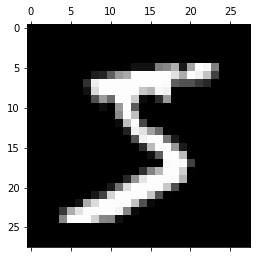

5


In [128]:
plt.matshow(X[0].reshape(28, 28))
plt.show()
print(y[0])

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train = X_train.reshape(len(X_train), -1)
X_val = X_val.reshape(len(X_val), -1)
X_test = X_test.reshape(len(X_test), -1)

print("Train data shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Validationn data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train data shape: (42000, 784)
Train labels shape: (42000,)
Validationn data shape: (14000, 784)
Validation labels shape: (14000,)
Test data shape: (14000, 784)
Test labels shape: (14000,)


In [170]:
from algorithms.neural_network import *

In [186]:
input_size = 784
hidden_size = 50
num_classes = 10
nn = NeuralNetwork(input_size, hidden_size, num_classes)

history = nn.train(X_train, y_train, X_val, y_val,
                   num_iters=2000, batch_size=200,
                   learning_rate=1e-4, learning_rate_decay=0.95,
                   reg=0.25, verbose=True)

val_acc = (nn.predict(X_val) == y_val).mean()
print("Validation accuracy:", val_acc)

iteration 0 / 2000: loss 2.302683
iteration 100 / 2000: loss 2.302128
iteration 200 / 2000: loss 2.297649
iteration 300 / 2000: loss 2.259091
iteration 400 / 2000: loss 2.035850
iteration 500 / 2000: loss 1.608667
iteration 600 / 2000: loss 1.271464
iteration 700 / 2000: loss 0.993352
iteration 800 / 2000: loss 0.872831
iteration 900 / 2000: loss 0.804767
iteration 1000 / 2000: loss 0.689178
iteration 1100 / 2000: loss 0.614542
iteration 1200 / 2000: loss 0.632366
iteration 1300 / 2000: loss 0.626511
iteration 1400 / 2000: loss 0.535528
iteration 1500 / 2000: loss 0.495442
iteration 1600 / 2000: loss 0.537950
iteration 1700 / 2000: loss 0.419238
iteration 1800 / 2000: loss 0.465448
iteration 1900 / 2000: loss 0.357864
Validation accuracy: 0.8784285714285714


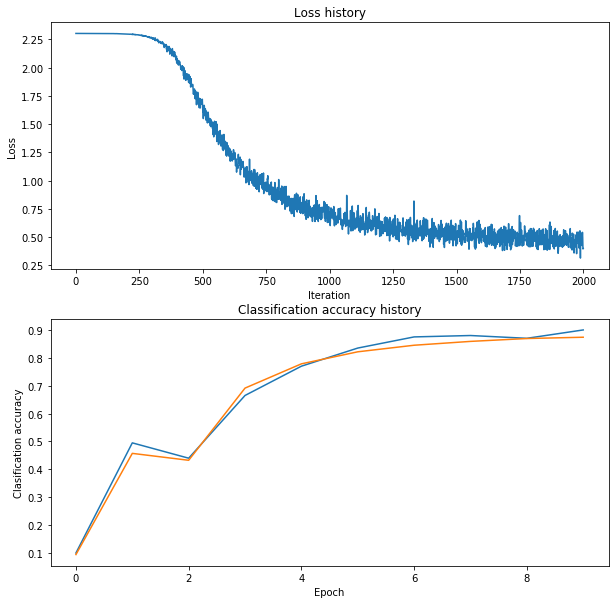

In [187]:
# Plot the loss function and train / validation accuracies
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(history['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history['train_acc_history'], label='train')
plt.plot(history['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [189]:
best_net = None

hidden_size = [25, 50, 100]
learning_rates = [1e-5, 1e-3, 1e-1]
regularization_strengths = [0.75, 0.75, 1.25]

results = {}
best_val = -1

for hs in hidden_size:
    for lr in learning_rates:
        for rs in regularization_strengths:
            nn = NeuralNetwork(input_size, hs, num_classes)
            s = nn.train(X_train, y_train, X_val, y_val,
                        num_iters=2000,
                        batch_size=200,
                        learning_rate=lr,
                        learning_rate_decay=0.95,
                        reg=rs,
                        verbose=False)

            val_acc = (nn.predict(X_val) == y_val).mean()
            if val_acc > best_val:
                best_val = val_acc
                best_net = nn
            results[(hs, lr, rs)] = val_acc
            
for hs, lr, rs in sorted(results):
    val_accuracy = results[(hs, lr, rs)]
    print('hs %d lr %e reg %e val accuracy: %f' % (
                hs, lr, rs, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

E:\code\projects\ai_notebooks\algorithms\neural_network.py:48: RuntimeWarning: overflow encountered in exp
  e_sum = np.sum(np.exp(scores), axis=1, keepdims=True)
E:\code\projects\ai_notebooks\algorithms\neural_network.py:50: RuntimeWarning: overflow encountered in exp
  prob = np.exp(scores) / e_sum
E:\code\projects\ai_notebooks\algorithms\neural_network.py:50: RuntimeWarning: invalid value encountered in true_divide
  prob = np.exp(scores) / e_sum
E:\code\projects\ai_notebooks\algorithms\neural_network.py:52: RuntimeWarning: divide by zero encountered in log
  print(prob.shape)
E:\code\projects\ai_notebooks\algorithms\neural_network.py:65: RuntimeWarning: invalid value encountered in greater
  


hs 25 lr 1.000000e-05 reg 7.500000e-01 val accuracy: 0.284286
hs 25 lr 1.000000e-05 reg 1.250000e+00 val accuracy: 0.267000
hs 25 lr 1.000000e-03 reg 7.500000e-01 val accuracy: 0.936500
hs 25 lr 1.000000e-03 reg 1.250000e+00 val accuracy: 0.930429
hs 25 lr 1.000000e-01 reg 7.500000e-01 val accuracy: 0.114357
hs 25 lr 1.000000e-01 reg 1.250000e+00 val accuracy: 0.101714
hs 50 lr 1.000000e-05 reg 7.500000e-01 val accuracy: 0.322500
hs 50 lr 1.000000e-05 reg 1.250000e+00 val accuracy: 0.231786
hs 50 lr 1.000000e-03 reg 7.500000e-01 val accuracy: 0.941000
hs 50 lr 1.000000e-03 reg 1.250000e+00 val accuracy: 0.936143
hs 50 lr 1.000000e-01 reg 7.500000e-01 val accuracy: 0.114357
hs 50 lr 1.000000e-01 reg 1.250000e+00 val accuracy: 0.101714
hs 100 lr 1.000000e-05 reg 7.500000e-01 val accuracy: 0.274071
hs 100 lr 1.000000e-05 reg 1.250000e+00 val accuracy: 0.385714
hs 100 lr 1.000000e-03 reg 7.500000e-01 val accuracy: 0.946929
hs 100 lr 1.000000e-03 reg 1.250000e+00 val accuracy: 0.939357
hs 1

In [190]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9471428571428572
